# Simpson's Paradox
### ECON 148 - Lecture 4

In [92]:
# load pandas
import pandas as pd
import numpy as np

_____________

## Kidney Stone Data

In [93]:
# read kidney stone dataset
# Original source: Charig et al. BMJ 1986
# Source: https://github.com/Amol-Kulkarni91/Website_Datasets/blob/master/Datasets/Kidney%20Stones/kidney_stone_data.csv
kidney = pd.read_csv('kidney_stones.csv')
kidney

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1
...,...,...,...
695,B,small,0
696,B,small,1
697,B,small,1
698,A,large,1


In [94]:
# check for missing values
kidney.isnull().sum()

treatment     0
stone_size    0
success       0
dtype: int64

In [95]:
# calculate average success rate for each stone size
kidney.groupby('stone_size')['success'].mean()*100

stone_size
large    72.011662
small    88.235294
Name: success, dtype: float64

In [96]:
# calculate average success rate for each treatment
# A = open surgery (invasive)
# B = percutaneous nephrolithotomy (non-invasive)
kidney.groupby('treatment')['success'].mean()*100

treatment
A    78.000000
B    82.571429
Name: success, dtype: float64

In [97]:
# do the cross-tab
kidney.groupby(['stone_size', 'treatment'])['success'].mean()*100

stone_size  treatment
large       A            73.003802
            B            68.750000
small       A            93.103448
            B            86.666667
Name: success, dtype: float64

<Axes: xlabel='stone_size'>

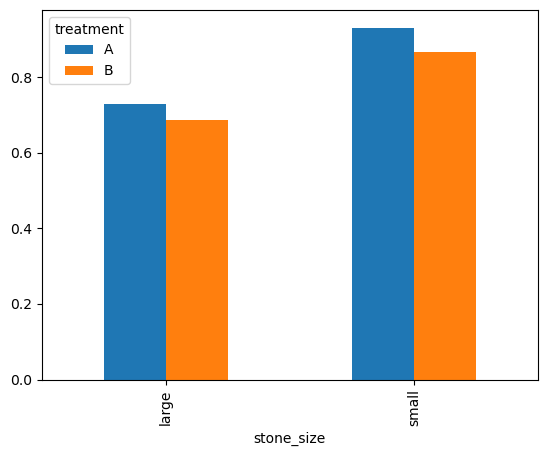

In [119]:
# plot the results
kidney.groupby(['stone_size', 'treatment'])['success'].mean().unstack().plot(kind='bar')

In [99]:
kidney.groupby('stone_size')['treatment'].value_counts()

stone_size  treatment
large       A            263
            B             80
small       B            270
            A             87
Name: count, dtype: int64

<Axes: xlabel='stone_size'>

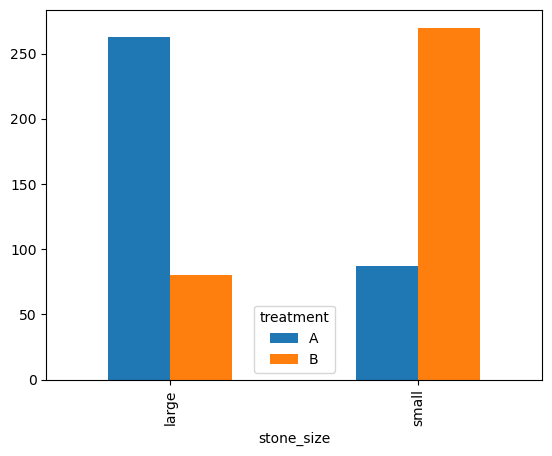

In [120]:
kidney.groupby('stone_size')['treatment'].value_counts().unstack().plot(kind='bar')

__________

# Berkeley Grad School Admissions

In [100]:
# read dataset
# Graduate admissions for Fall 1973
# Source: "https://waf.cs.illinois.edu/discovery/berkeley.csv"
df = pd.read_csv('berkeley.csv')
df

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [101]:
# check for missing values
df.isnull().sum()

Year         0
Major        0
Gender       0
Admission    0
dtype: int64

In [102]:
df['Admission'].value_counts()

Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

In [103]:
df['Major'].value_counts()

Major
Other    7924
A        1246
C         918
D         792
F         714
B         585
E         584
Name: count, dtype: int64

In [128]:
df = df[df['Major'] != 'Other']
df['Major'].value_counts()

Major
A    1246
C     918
D     792
F     714
B     585
E     584
Name: count, dtype: int64

In [129]:
df['Gender'].value_counts()

Gender
M    3004
F    1835
Name: count, dtype: int64

In [130]:
df.groupby('Gender')['Admission'].value_counts()

Gender  Admission
F       Rejected     1278
        Accepted      557
M       Accepted     1511
        Rejected     1493
Name: count, dtype: int64

In [131]:
df['Accepted'] = np.where(df['Admission'] == 'Accepted', 1, 0)

In [132]:
df['Accepted'].mean()*100

42.73610250051664

In [133]:
df.groupby('Gender')['Accepted'].mean()*100

Gender
F    30.354223
M    50.299601
Name: Accepted, dtype: float64

In [134]:
df.groupby('Major')['Accepted'].mean()*100

Major
A    73.354735
B    63.247863
C    34.967320
D    33.964646
E    25.171233
F     6.582633
Name: Accepted, dtype: float64

In [135]:
df.groupby(['Major','Gender'])['Accepted'].mean()*100

Major  Gender
A      F         82.407407
       M         72.495606
B      F         68.000000
       M         63.035714
C      F         33.895447
       M         36.923077
D      F         34.933333
       M         33.093525
E      F         23.918575
       M         27.748691
F      F          7.331378
       M          5.898123
Name: Accepted, dtype: float64

<Axes: xlabel='Major'>

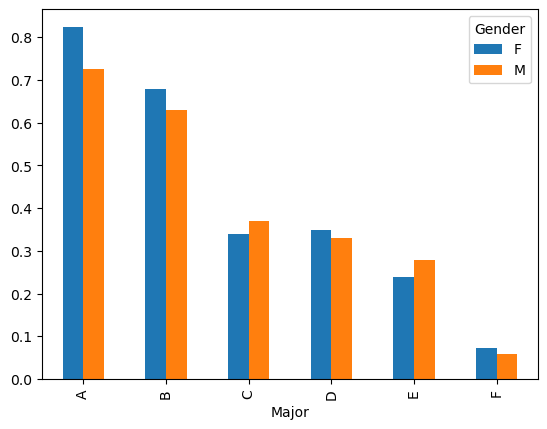

In [136]:
df.groupby(['Major','Gender'])['Accepted'].mean().unstack().plot(kind='bar')

In [137]:
df.groupby('Major')['Gender'].value_counts()

Major  Gender
A      M         1138
       F          108
B      M          560
       F           25
C      F          593
       M          325
D      M          417
       F          375
E      F          393
       M          191
F      M          373
       F          341
Name: count, dtype: int64

In [138]:
df['Male'] = np.where(df['Gender'] == 'M', 1, 0)

In [139]:
df2 = df.groupby('Major')[['Male', 'Accepted']].mean()*100
df2

,Male,Accepted
Major,,
A,91.332263,73.354735
B,95.726496,63.247863
C,35.403050,34.967320
D,52.651515,33.964646
E,32.705479,25.171233
F,52.240896,6.582633


<Axes: xlabel='Male', ylabel='Accepted'>

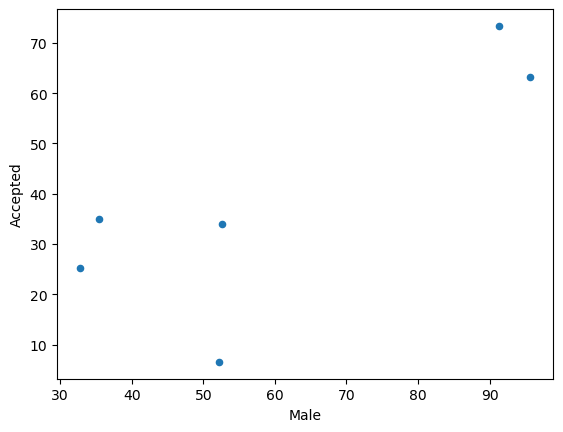

In [140]:
df2.plot(kind='scatter', x='Male', y='Accepted')